<h2> <center> Machine Learning  <center> </h2>


      
<h3>  <center>Conceitos básicos : 
    
   
    
     Normalização dos dados 
     
     Treinamento supervisionado e não-supervisionado

     Regressão não-linear  

<h2> <center>O que é ? Aonde é aplicado ? </h2>

<h3>Machine learning is a subset of AI that uses computer algorithms to analyze data and make intelligent decisions based on what it is learned without being explicitly programmed. Machine learning algorithms are trained with large sets of data and they learn from examples. They do not follow rules-based algorithms. Machine learning is what enables machines to solve problems on their own and make accurate predictions using the provided data.</h3>

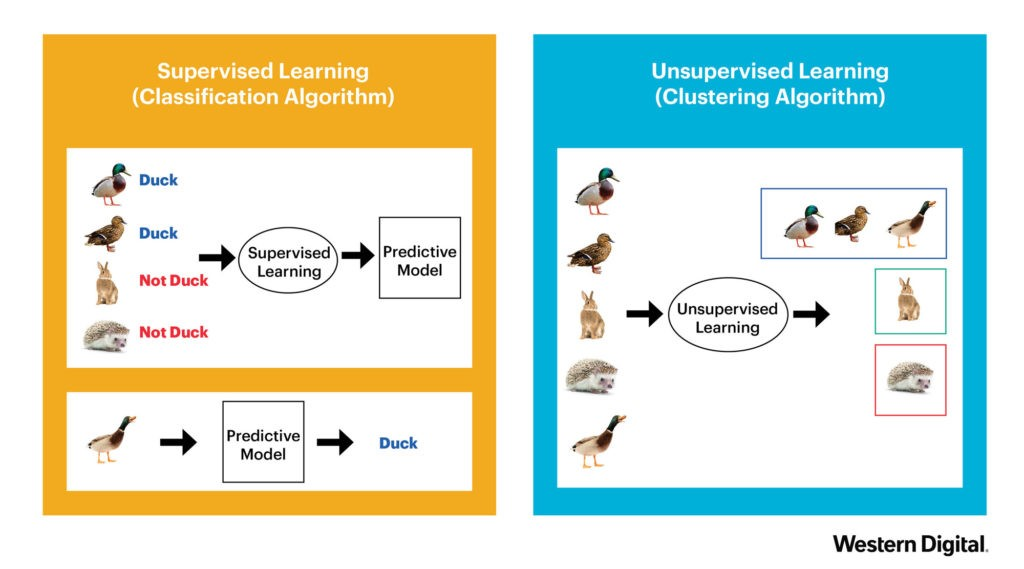

<h2><center> Machine Learning </h2>

In [39]:
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [40]:
x=np.arange(-10,11,0.1)

In [41]:
y = 1*(x**2) + 1*x + 3

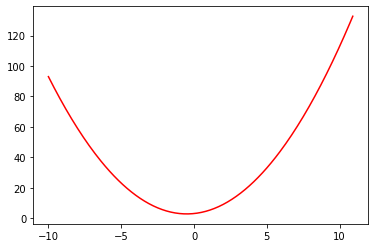

In [42]:
plt.plot(x,y,'r')

In [43]:
y_noise = 5 * np.random.normal(size=x.size)

In [44]:
ydata = y + y_noise 

Text(0.5, 0, 'Independent Variable')

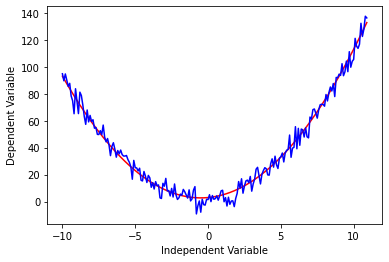

In [45]:
plt.plot(x,y,'r')
plt.plot(x,ydata,'b')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
#plt.show()

In [46]:
pearson_coef, p_value = stats.pearsonr(x, y)
print("The Pearson Correlation Coefficient (x,y) without noise is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient (x,y) without noise is 0.33071080271226755  with a P-value of P = 9.462588289129882e-07


In [47]:
pearson_coef, p_value = stats.pearsonr(x, ydata)
print("The Pearson Correlation Coefficient (x,ydata) with noise is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient (x,ydata) with noise is 0.3115660268795088  with a P-value of P = 4.161132561388723e-06


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, ydata, test_size=0.30, random_state=0)

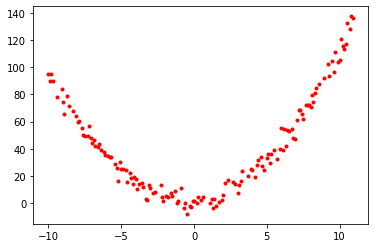

In [49]:
plt.plot(X_train,y_train,'.r')


<h2><center> Regressão Linear - Usando a Transformação de X -- XT = (X,X^2, X^3,..,Xˆn)<h2>

In [50]:
poly = PolynomialFeatures(degree=2)
X_T = poly.fit_transform(X_train.reshape(-1,1))
X_T[0:5]

array([[ 1.  , -3.9 , 15.21],
       [ 1.  , -7.6 , 57.76],
       [ 1.  , -7.  , 49.  ],
       [ 1.  , -4.  , 16.  ],
       [ 1.  , -4.4 , 19.36]])

In [51]:
#lr.fit(x.reshape(-1,1),y)
lr = LinearRegression()
lr.fit(X_T,y_train)

LinearRegression()

In [52]:
y_T = lr.predict(X_T)
y_T[0:5]

array([14.35715736, 54.72057442, 46.27187983, 15.0796846 , 18.17444686])

In [53]:
lr.score(X_T,y_train)

0.984705676448606

<h2><center> Regressão Não-Linear - Função Quadrática <h2>

In [54]:
def quadratic(x,a,b,c):
     y = a*(x**2) + b*x + c 
     return y

In [55]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(quadratic, X_train, y_train)
#print the final parameters
print(" a = %f, b = %f, c = %f" % (popt[0], popt[1],popt[2]))

 a = 1.023266, b = 0.858533, c = 2.141552


In [56]:
# build the model using train set
#popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = quadratic(X_test, *popt)
y_hat

array([ 73.8282191 ,   4.51755225,  42.32381445,  86.33528957,
        88.93839219,   3.63928626,   6.13476578,   8.98293283,
         2.30628545,  36.61607715,  28.37343266,  39.03896986,
        21.59665433,  92.75292727,   1.96186117,   2.94520822,
       100.62758139,  37.34624193,  11.05150104,  63.90602083,
        58.29133567,  68.77502598,  82.65951422,  18.9993007 ,
         2.10961604,  16.88952246,  10.6832983 ,  10.09604448,
        41.54372388,  83.37007953,   6.39063549,  30.91698864,
        20.17994287,   8.257478  ,  87.06182264,  26.72609375,
        67.77026933,   7.00229348,  67.13155894,  17.68142957,
        94.69089281,  57.70052855,   2.64868722,  22.86264413,
        88.20387524,   6.82664812,  18.49380201,  29.42340517,
        12.97349882,   3.48326814,  51.82248155,   2.23763748,
        52.38135314, 108.82968077,  80.85232454,  33.82794848,
         3.7430767 ,  11.29101744,  13.23696686,   4.02335058,
       126.21621532,   3.24392492,   5.97508818])

In [57]:
print("Residual sum of squares (MSE): %f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: " , r2_score(y_test,y_hat) )

Residual sum of squares (MSE): 27.910963
R2-score:  0.9740972575222023


In [58]:
y_test

array([ 81.13775973,   2.8255355 ,  34.08795884,  87.70181064,
        92.07642018,   9.04540808,   0.46037754,   9.92978651,
         8.50869475,  38.06710418,  31.10910508,  49.34540504,
        22.73061539,  94.50701784,   1.72215912,   2.6088784 ,
        96.23361608,  32.93328071,  12.37770172,  59.09165494,
        62.69183449,  63.18796233,  74.78907534,  15.32567224,
        -9.12968377,  25.40773301,  11.5307618 ,   6.24152541,
        39.64025294,  82.02262277,   9.78113686,  32.15272255,
        23.02786064,  17.20993295,  77.87441366,  25.54743383,
        68.18555871,  -3.72662992,  57.27959517,  19.32501185,
        93.56417367,  54.41157926,   1.70138953,  19.80529981,
        85.43644357,   4.18810195,  13.11010438,  34.18422482,
         9.32089309,   4.30963928,  52.6109978 ,   5.11044324,
        47.88198447,  99.64242843,  65.15910593,  38.2119031 ,
         7.99827295,  15.31870856,  18.63313215,   8.40297206,
       122.45007117,   1.08859249,   3.41428973])

<h2> A transformação funciona para f(x)  Polinomiais - E para outras funções não-lineares ??? </h2>

In [59]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [60]:
x=np.arange(-10,10,0.1)
Y = sigmoid(x,1,1)

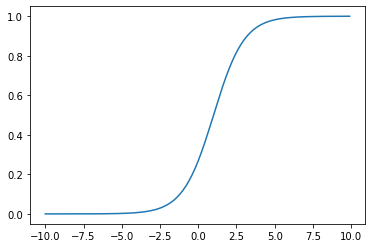

In [61]:
plt.plot(x,Y)

<h3> Por que às vezes (ou quase sempre) preciso normalizar os dados de entrada de uma ML ? </h3>

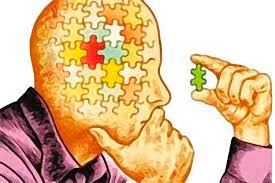

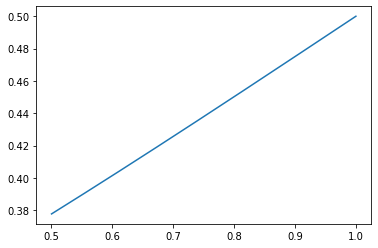

In [62]:
x=np.arange(50,100,0.1)
x=x/np.max(x)
Y = sigmoid(x,1,1)
plt.plot(x,Y)

<h3>  <center>O que está ERRADO ???? 

      Dados de entrada precisam ser normalizados !!!! 
</h3>


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x.reshape(-1,1)))
xT = scaler.transform(x.reshape(-1,1))
#xT = x/np.max(x)

StandardScaler()


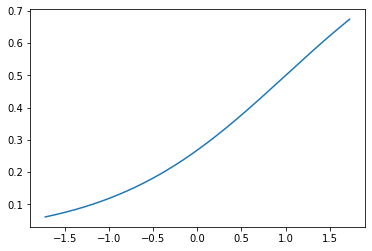

In [64]:
Y = sigmoid(xT,1,1)
plt.plot(xT,Y)

<h3>  <center> Vetor de entrada composto por N Features 
          
      com ranges diferentes também será necessário a 
    
            Normalização !!!!
 </h3> 

In [ ]:
import pandas as pd
df = pd.read_csv('weatherHistory.csv')
df.describe()

In [ ]:
df.head()

In [ ]:
scaler.fit(df[['Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']])

In [ ]:
df[['Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']] = scaler.transform(df[['Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']])


In [ ]:
df.head()

In [ ]:
df.corr()

In [ ]:
df.plot(kind='scatter', x='Humidity', y='Temperature (C)')

In [ ]:
df.corr()

<h2><center> K-NN (K Nearest Neighbor) </h2>

<h3> <center>
    
    
    
•	 Amongst the simplest of all machine learning
algorithms. No eXplicit training or model.
    
•	 Can be used both for classifcaton and
regression.
    
•	 Use XIs K-Nearest Neighbors to vote on what
XIs label should be. </h3>

<h2><center> Classification Problem </h2>

<h3><center>Classify using the majority vote of the k closest training points</h3>


Screen Shot 2021-03-10 at 8.23.12 PM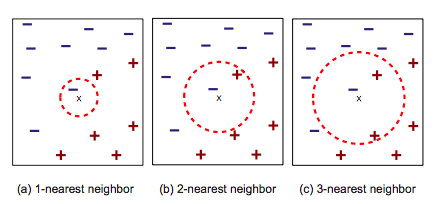

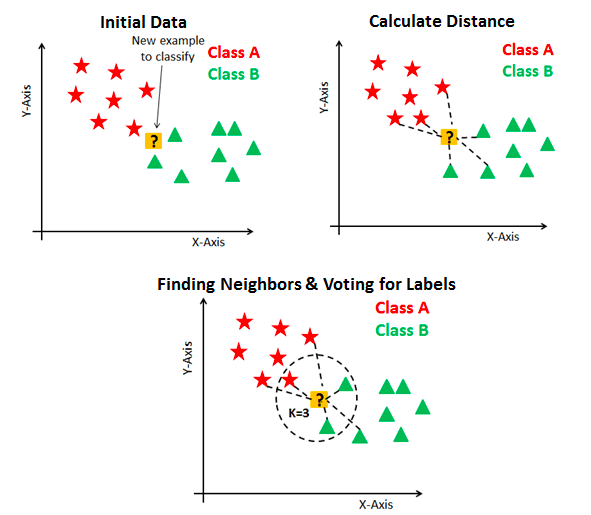

<h3>For regression: the value for the test example
becomes the (weighted) average of the values
of the K neighbors. </h3>

<h3> 
    
The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Our model is ready.</h3>

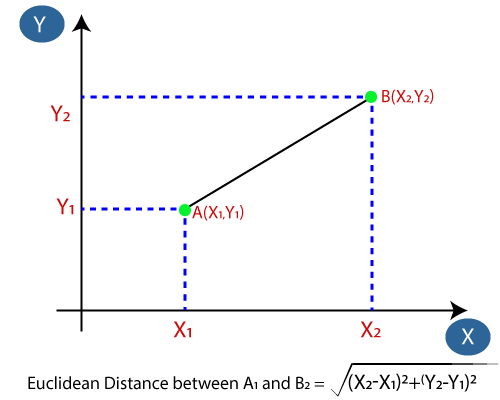

<h3><center>Diagrama de Voronoi</center></h3>

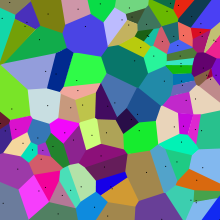

<h2> <center> Algumas Métricas para problemas de Classificação </center></h2> 

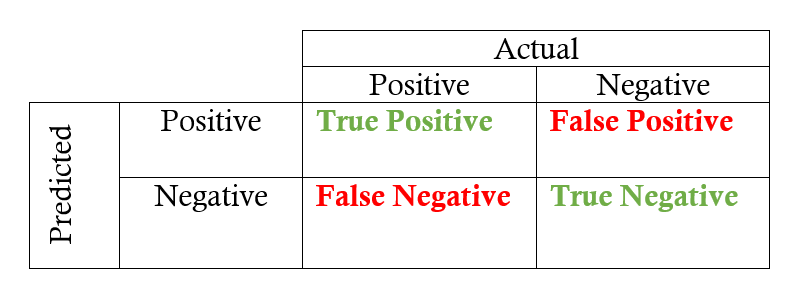

<center>
<h2>Accuracy = (TP+TN)/(TP+FP+FN+TN) </h2>
A acurácia é a proximidade de um resultado com o seu valor de referência real. Dessa forma, quanto maior a acurácia, mais próximo da referência ou valor real é o resultado encontrado.
</center>

<center>
<h2> Precision = (TP)/(TP+FP)</h2>
    Precisão é o grau de variação de resultados de uma medição. O quão menos dispersos os dados estão, melhor o valor.
</center>

<center>
<h2>Recall = (TP)/(TP+FN) </h2>
Ability of a classification model to identify all relevant instances
</center>

<h2 style="color:#0033cc;text-align:center;" >Comparação entre acurácia e precisão</h2>

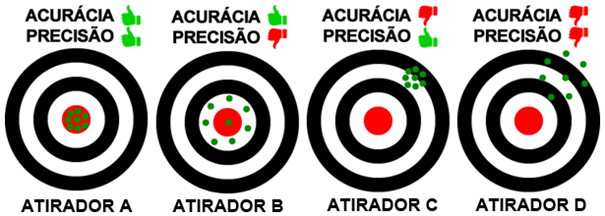

In [ ]:
df2 = pd.read_csv('dataClean.csv')

In [ ]:
from sklearn import neighbors

In [ ]:
n_neighbors = 10
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
X = df2[['Duration']]
y = df2[['Calories']]

In [ ]:
T = np.array(60)
y_ = knn.fit(X, y).predict(X)

In [ ]:
y_[0:5]

In [ ]:
plt.plot(X,y,'.r')
plt.plot(X,y_,'.b')

In [ ]:
print("R2-score: " , r2_score(y,y_) )

In [2]:
from sklearn import datasets

In [3]:
#Load dataset
wine = datasets.load_wine()

In [66]:
df_data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [67]:
df_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine.data)
wine_T = scaler.transform(wine.data)


In [121]:
#wine_T = wine.data
wine_T

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_T, wine.target, test_size=0.2,random_state=20)

In [173]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [174]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [175]:
y_pred = knn.predict(X_test)
y_pred

array([1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0])

In [176]:
from sklearn.metrics import r2_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [161]:
y_test

array([1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1,
       0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1])

In [179]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, wine_T, wine.target, cv=10)
scores

array([0.94444444, 0.94444444, 0.94444444, 0.94444444, 1.        ,
       0.94444444, 1.        , 1.        , 0.88235294, 0.94117647])

In [180]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=10)
scores

array([1.        , 1.        , 0.92857143, 0.92857143, 0.85714286,
       1.        , 1.        , 0.92857143, 0.85714286, 0.85714286])

<h3><center>Explicação de como funciona o cross_val_score</center></h3>

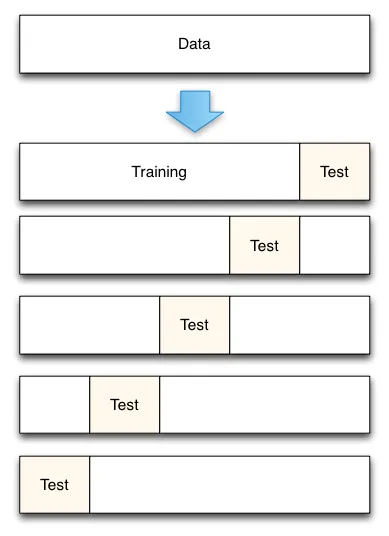



In [178]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.94 accuracy with a standard deviation of 0.06


<h2><center> Decision Tree </h2>
   
<h3><center>  Tree-like model of decisions </h3>   
    
    
    

Screen Shot 2021-03-11 at 3.38.55 PM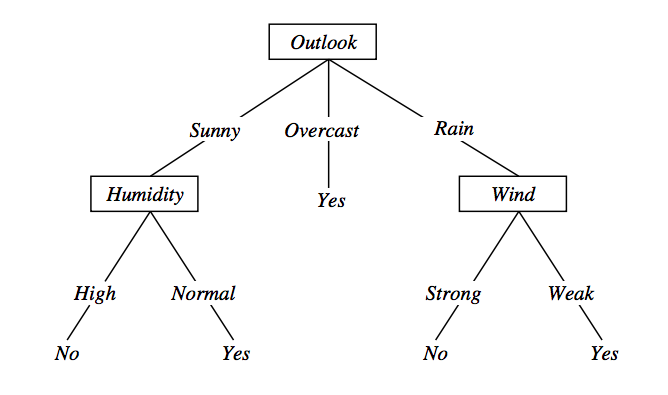

<h2><center>Representação de uma árvore de decisão</h2> 
    
<h3>
    
Cada nó interno testa um atributo
    
Cada ramo corresponde ao valor do atributo
    
Cada nó folha atribui uma classificação
</h3>    

<h2><center>  Uso de árvores de decisão  </h2>
    
<h3>
    
Instâncias que podem ser descritas por atributos {pares de valores}

A função de destino tem valor discreto

Hipótese disjuntiva pode ser necessária

Dados de treinamento possivelmente ruidosos    
    
 </h3>   

<h2><center>  Algumas aplicações  </h2>
    
<h3>
    
Equipamento ou diagnóstico médico
    
Análise de risco de crédito
    
Modelagem de preferências de programação de calendário   
    
 </h3>   

<h3>

Loop principal:
    

1. A <- o melhor "atributo" de decisão para o próximo nó

        
2. Atribua A como atributo de decisão para o nó

        
3. Para cada valor de A, crie um novo nó abaixo 
        
        
4. Classifique os exemplos de treinamento para nós folha

        
5. Se os exemplos de treinamento forem perfeitamente classificados, então
STOP, senão iterar sobre o novo nó folha
        
        
</h3>        

<h2> <center> Como definir os melhores atributos  e por que ???</h2> 

<h3> <center> Entropia dos dados </h3>
     

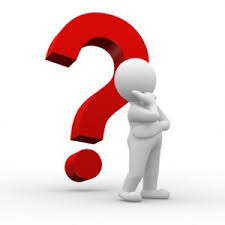

In [ ]:
df_social = pd.read_csv('Social_Network_Ads.csv')
df_social.head()

In [ ]:
df_social.info()

In [ ]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Male','Female'])
df_social[['Gender']] = le_sex.transform(df_social.Gender) 

In [ ]:
df_social.head()


In [ ]:
X=df_social[['Age','EstimatedSalary']]

In [ ]:
y = df_social.Purchased


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
dTree = dTree.fit(X_train,y_train)

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(dTree)

In [ ]:
# pip install graphviz
import graphviz as grp
from sklearn import tree

#dot_data = tree.export_graphviz(dTree, out_file=None) 
#graph = grp.Source(dot_data) 
#graph.render("Purcahsed") 

In [ ]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
dot_data = StringIO()
filename = "Purchasetree.png"
featureNames = X.columns[0:3]
out=tree.export_graphviz(dTree,feature_names=featureNames, out_file=dot_data, class_names= "Purchased", filled=True,  special_characters=True,rotate=False)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png(filename)
#img = mpimg.imread(filename)
#plt.figure(figsize=(100, 200))
#plt.imshow(img,interpolation='nearest')

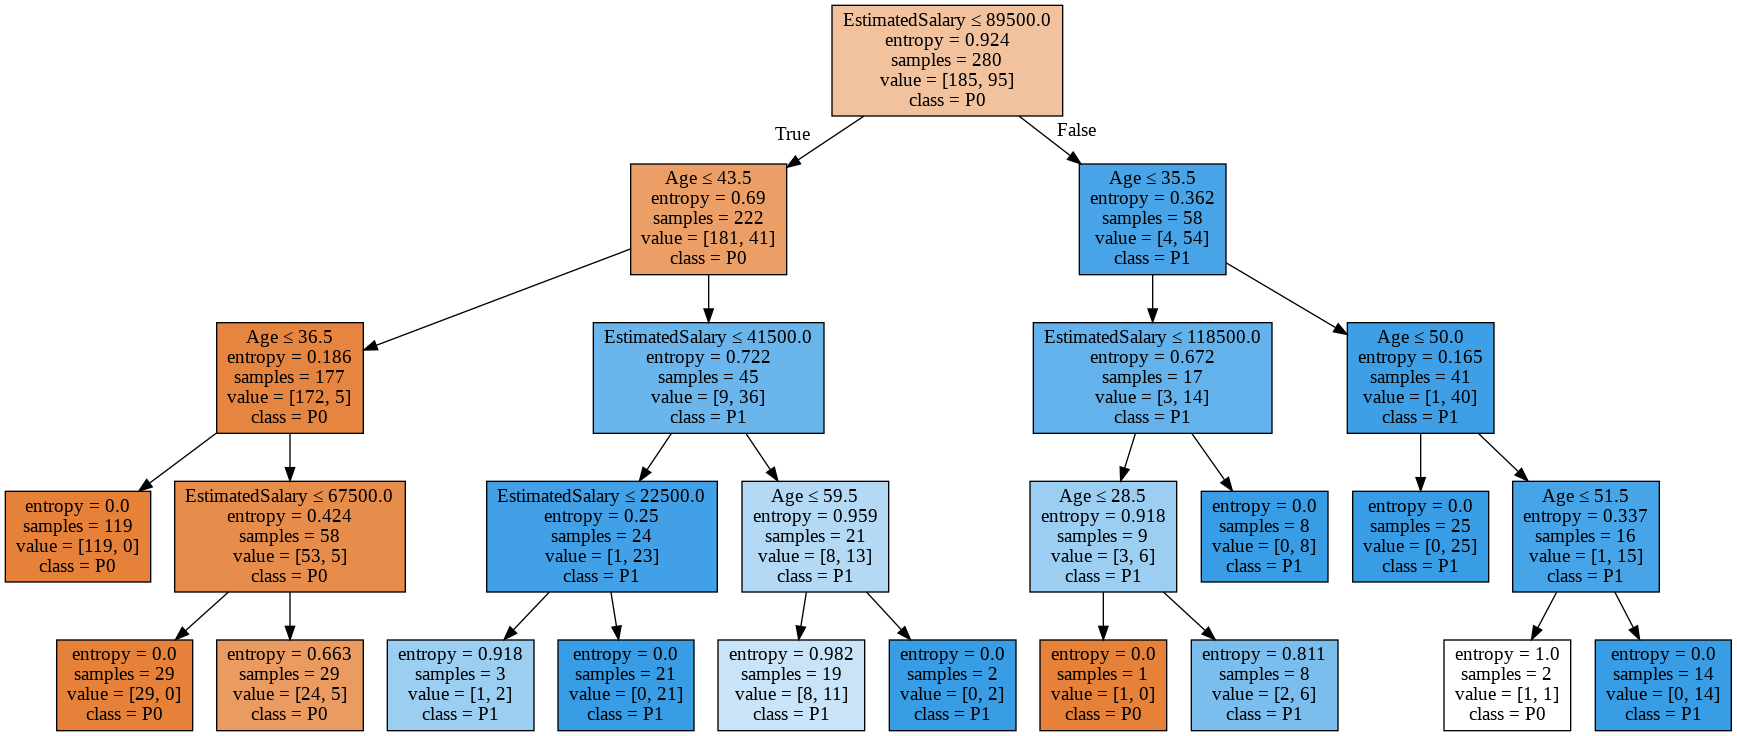